In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from run_backtest import load_trackers
from utils import clean_stale_prices

from entities import EM_CDS_TRACKER_DICT, FX_TRACKER_DICT
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

c:\Users\pcampos\Anaconda3\envs\bwgi\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
OUTPUT_FOLDER = Path(
    r"C:\Users\pcampos\OneDrive - Insper - Instituto de Ensino e Pesquisa\Dissertação Mestrado\Analysis"
)

def plot_bar_contribution(
    heights: pd.Series,
    title: str,
):
    plt.figure(figsize=(10, 6))
    cumulative_values = np.cumsum(heights) - heights
    plt.bar(
        range(1, len(heights) + 1),
        heights,
        bottom=cumulative_values,
        alpha=0.5,
        align="center",
        label="Explained Variance",
    )

    plt.ylim(0, 1)
    plt.xlabel("Componente Principal", labelpad=10)
    plt.ylabel("Explicação da Variância", labelpad=10)
    plt.title(title, fontweight="bold", pad=20)

    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
    plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    plt.grid(True, which="major", axis="y", linestyle="--", linewidth=0.75)
    plt.grid(True, which="minor", axis="x", linestyle="--", linewidth=0.75)

    plt.gca().tick_params(axis="x", which="both", length=0)

    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    plt.xticks(range(1, len(heights) + 1))
    plt.tight_layout()
    plt.savefig(
        OUTPUT_FOLDER.joinpath(f"Charts_overleaf/{title}_pca.pdf"),
        bbox_inches="tight",
    )
    plt.savefig(
        OUTPUT_FOLDER.joinpath(f"Charts_powerpoint/{title}_pca.svg"),
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()


def plot_historical_correlation(
    rolling_corr: pd.Series,
    total_correlation: float,
    title: str = "Correlação entre a Primeira Componente Principal de FX e a de CDS",
    y_lim: tuple[float, float] = (0, 1),
):
    plt.figure(figsize=(10, 6))
    rolling_corr.plot()
    plt.axhline(
        total_correlation,
        color="red",
        linestyle="--",
        label="Correlação Média do Período",
    )
    plt.grid(True, which="both", axis="both", linestyle="--", linewidth=0.75)
    plt.xlabel(None)
    plt.xlim(rolling_corr.dropna().index.min(), rolling_corr.index.max())
    plt.ylim(*y_lim)
    plt.legend(ncol=2)
    plt.title(title, fontweight="bold", pad=20)
    plt.tight_layout()
    plt.savefig(
        OUTPUT_FOLDER.joinpath(f"Charts_overleaf/{title}_pca_corr.pdf"),
        bbox_inches="tight",
    )
    plt.savefig(
        OUTPUT_FOLDER.joinpath(f"Charts_powerpoint/{title}_pca_corr.svg"),
        bbox_inches="tight",
        transparent=True,
    )
    plt.show()

In [3]:
cds = load_trackers(EM_CDS_TRACKER_DICT).rename(columns=lambda col: col + "_cds")
fx = load_trackers(FX_TRACKER_DICT).rename(columns=lambda col: col + "_fx")

cds = pd.concat([clean_stale_prices(cds[col].copy()) for col in cds], axis=1)
fx = pd.concat([clean_stale_prices(fx[col].copy()) for col in fx], axis=1)

In [4]:
RETURN_WINDOW = 21

df_cds = (
    np.log(cds)
    .fillna(method="ffill", limit=5)
    .diff(RETURN_WINDOW)
    .dropna(how="all")
    .copy()
)
df_cds = df_cds.loc["2009-12-10":].dropna(how="any", axis=1)
df_cds = (df_cds - df_cds.mean())/ df_cds.std()

df_fx = (
    np.log(fx)
    .fillna(method="ffill", limit=5)
    .diff(RETURN_WINDOW)
    .dropna(how="all")
    .copy()
)
df_fx = df_fx.loc["2004-08-02":].dropna(how="any", axis=1)
df_fx = (df_fx - df_fx.mean()) / df_fx.std()

new_index = df_fx.dropna().index.intersection(df_cds.dropna().index)
df_fx = df_fx.reindex(new_index)
df_cds = df_cds.reindex(new_index)

df_all = pd.concat([df_cds, df_fx], axis=1).dropna()
df_all

,AED_cds,BRL_cds,CNY_cds,CLP_cds,COP_cds,MYR_cds,MXN_cds,PAB_cds,PEN_cds,PHP_cds,...,IDR_fx,INR_fx,MXN_fx,PLN_fx,RUB_fx,SGD_fx,THB_fx,TRY_fx,TWD_fx,ZAR_fx
date,,,,,,,,,,,,,,,,,,,,,
2009-12-10,-5.820141,-0.206183,0.388088,-0.547432,-0.319000,0.354626,0.080309,-0.036070,-0.177759,0.218604,...,-0.193797,-0.207992,0.832469,-0.110516,-0.864926,-0.162896,0.127058,-0.181900,-0.224146,-0.269373
2009-12-11,-5.427723,-0.256556,0.407237,-0.243662,-0.205214,0.241175,0.068864,-0.022027,-0.177783,0.185820,...,-0.267764,-0.206584,0.773857,-0.396195,-0.717943,-0.207709,0.166090,-0.222122,0.052530,-0.218940
2009-12-14,-4.722792,-0.021341,0.464546,-0.209928,0.060288,0.311435,0.338760,0.203991,0.182811,0.491422,...,-0.209679,-0.052239,0.841363,-0.540719,-0.610087,-0.156648,0.198774,-0.175148,0.025227,0.209480
2009-12-15,-4.866557,0.045741,0.599581,-0.159225,0.145434,0.395866,0.360827,0.401324,0.257531,0.700143,...,-0.533973,-0.250583,0.904248,-1.060399,-0.675835,-0.378196,0.161907,-0.231428,-0.009585,0.210145
2009-12-16,-4.804186,-0.180946,0.329075,-0.496569,-0.072602,0.324996,-0.055252,-0.008216,-0.072821,0.297084,...,-0.372884,-0.467550,0.740446,-1.152301,-0.825114,-0.483919,-0.013793,-0.301627,-0.550297,0.064346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-03,-0.305187,0.625312,0.038628,0.113943,0.475285,0.058075,0.351742,1.704462,0.413788,0.253066,...,0.064600,-0.011122,0.346135,-0.359129,-0.945584,0.122479,1.428520,0.599831,0.070069,0.414867
2024-10-04,-0.702668,0.724506,0.038583,0.237975,0.730632,0.058012,0.530867,1.725839,0.526618,0.252980,...,-0.185753,-0.018026,1.232875,-0.478023,-0.866008,-0.280283,0.942234,0.539398,-0.164545,0.383142
2024-10-07,-0.570070,0.664320,-0.008160,0.058652,0.703638,0.047102,0.523031,1.661021,0.640351,0.276689,...,-0.695113,-0.044162,1.003342,-0.591501,-0.913628,-0.455640,-0.158150,0.544261,-1.232901,0.521463


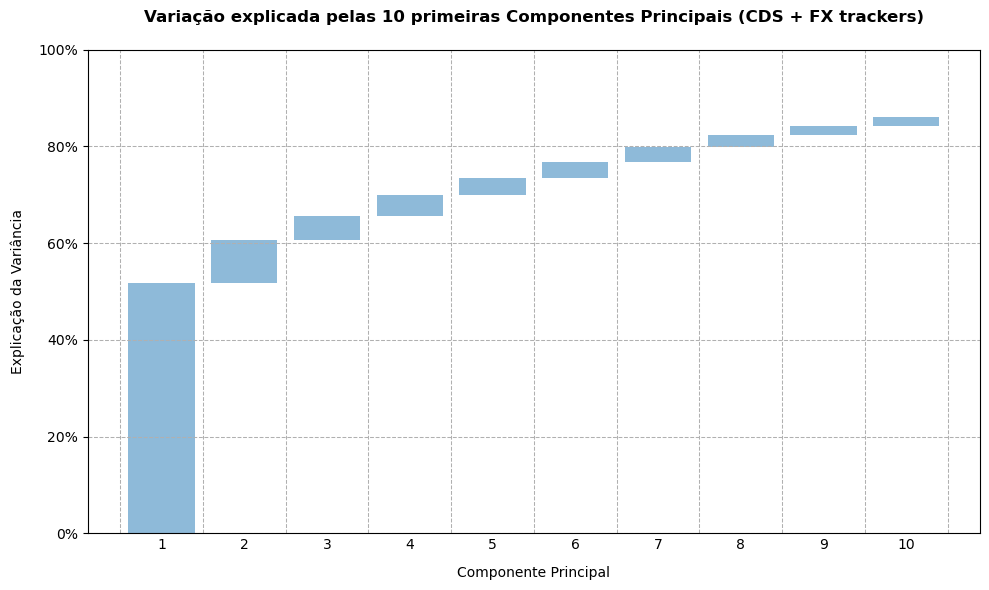

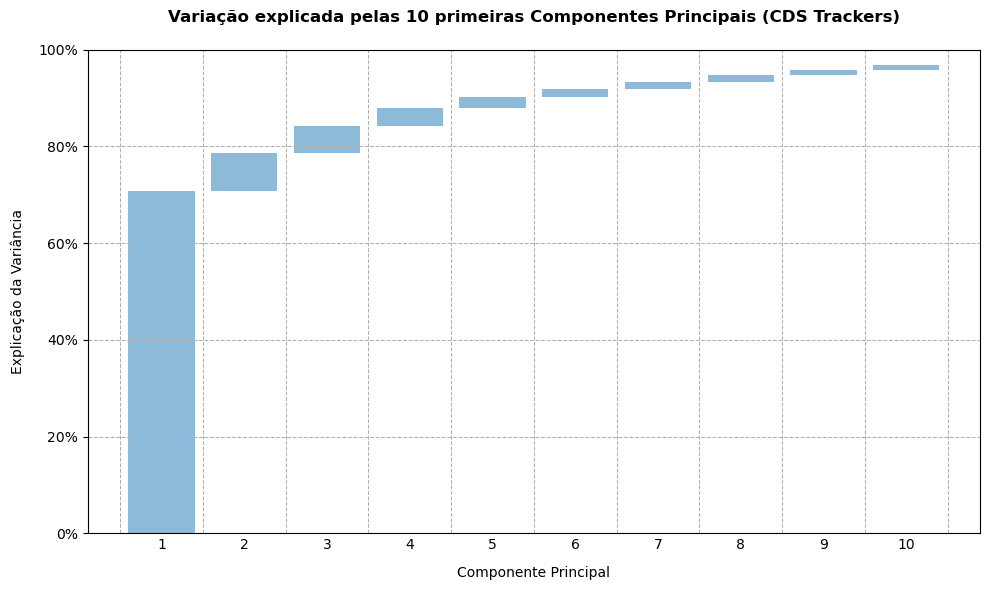

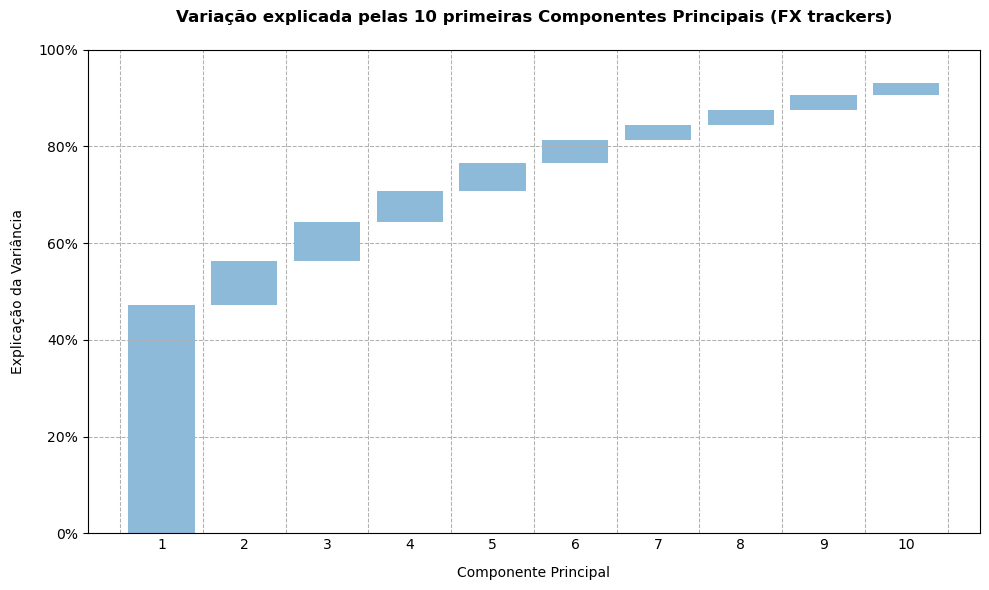

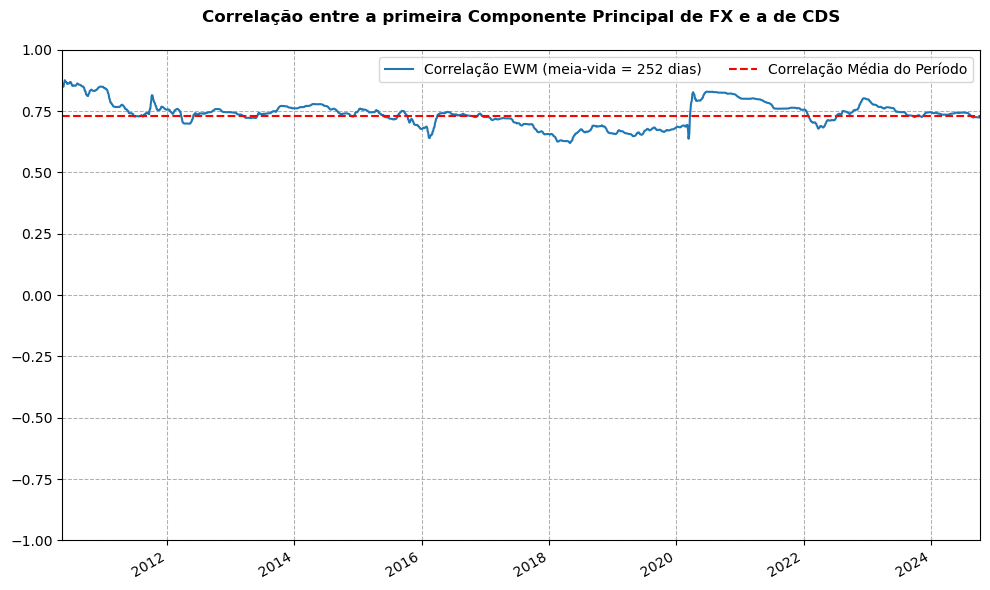

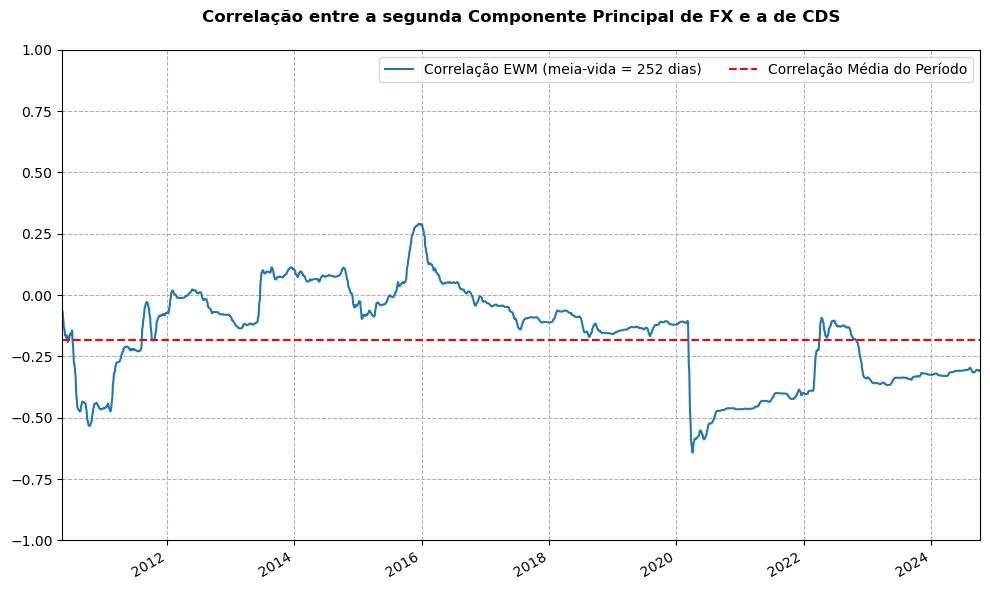

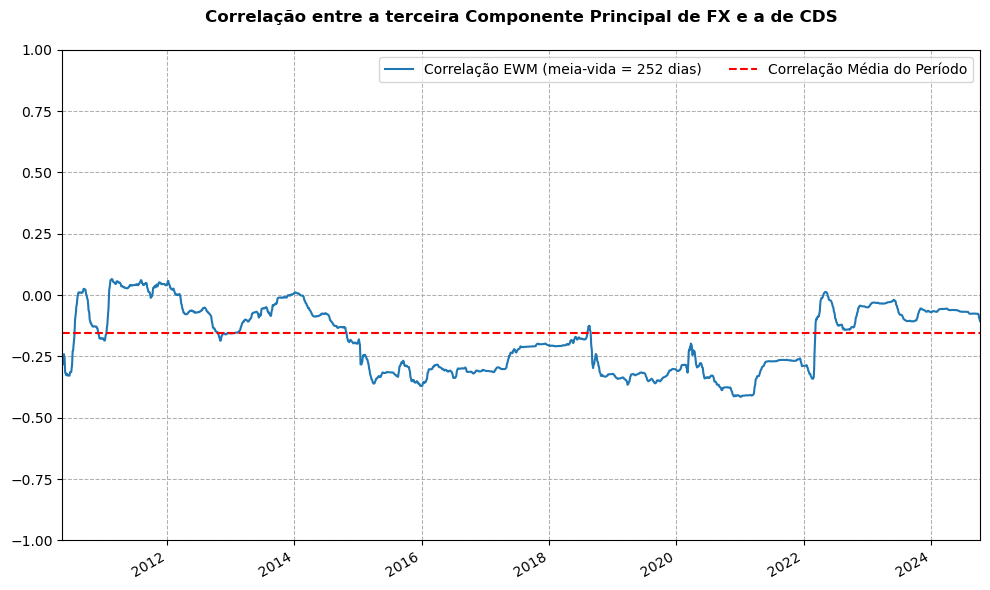

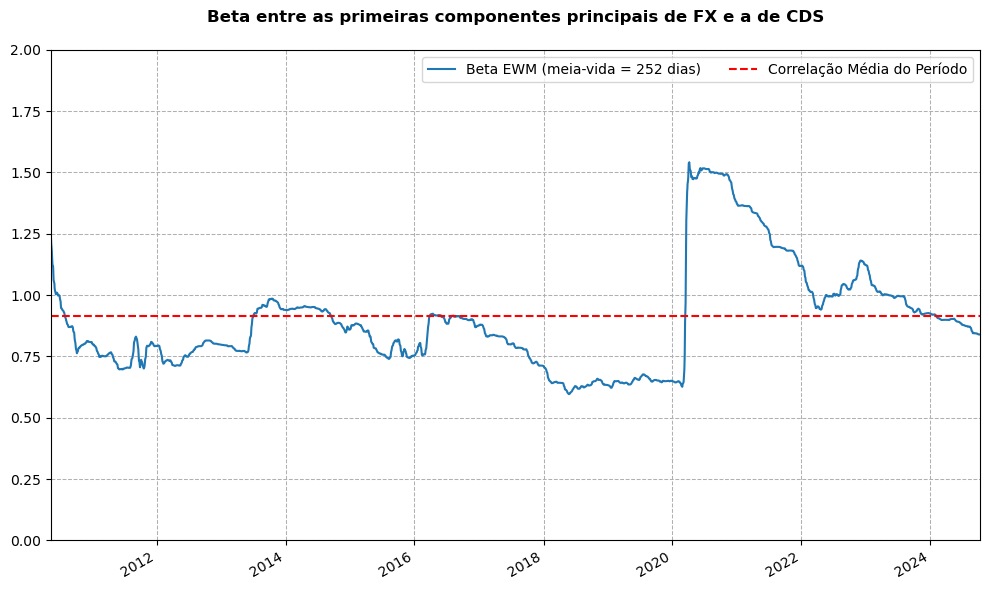

In [5]:
pca_all = PCA(n_components=10).fit(df_all)
plot_bar_contribution(
    pca_all.explained_variance_ratio_,
    "Variação explicada pelas 10 primeiras Componentes Principais (CDS + FX trackers)",
)
########################################################################################
pca_cds = PCA(n_components=10).fit(df_cds.dropna())
explained_variance_ratio = pca_cds.explained_variance_ratio_
plot_bar_contribution(
    pca_cds.explained_variance_ratio_,
    "Variação explicada pelas 10 primeiras Componentes Principais (CDS Trackers)",
)
########################################################################################
pca_fx = PCA(n_components=10).fit(df_fx.dropna())
explained_variance_ratio = pca_fx.explained_variance_ratio_
plot_bar_contribution(
    pca_fx.explained_variance_ratio_,
    "Variação explicada pelas 10 primeiras Componentes Principais (FX trackers)",
)
########################################################################################
pca_1_fx = pd.DataFrame(pca_fx.fit_transform(df_fx), index=new_index).iloc[:, 0]
pca_1_cds = pd.DataFrame(pca_cds.fit_transform(df_cds), index=new_index).iloc[:, 0]
plot_historical_correlation(
    pca_1_cds.ewm(halflife=252)
    .corr(pca_1_fx)
    .iloc[100:]
    .rename("Correlação EWM (meia-vida = 252 dias)"),
    pca_1_cds.corr(pca_1_fx),
    title="Correlação entre a primeira Componente Principal de FX e a de CDS",
    y_lim=(-1, 1),
)
########################################################################################
pca_2_fx = pd.DataFrame(pca_fx.fit_transform(df_fx), index=new_index).iloc[:, 1]
pca_2_cds = pd.DataFrame(pca_cds.fit_transform(df_cds), index=new_index).iloc[:, 1]
plot_historical_correlation(
    pca_2_cds.ewm(halflife=252)
    .corr(pca_2_fx)
    .iloc[100:]
    .rename("Correlação EWM (meia-vida = 252 dias)"),
    pca_2_cds.corr(pca_2_fx),
    title="Correlação entre a segunda Componente Principal de FX e a de CDS",
    y_lim=(-1, 1),
)
########################################################################################
pca_3_fx = pd.DataFrame(pca_fx.fit_transform(df_fx), index=new_index).iloc[:, 2]
pca_3_cds = pd.DataFrame(pca_cds.fit_transform(df_cds), index=new_index).iloc[:, 2]
plot_historical_correlation(
    pca_3_cds.ewm(halflife=252)
    .corr(pca_3_fx)
    .iloc[100:]
    .rename("Correlação EWM (meia-vida = 252 dias)"),
    pca_3_cds.corr(pca_3_fx),
    title="Correlação entre a terceira Componente Principal de FX e a de CDS",
    y_lim=(-1, 1),
)
########################################################################################
plot_historical_correlation(
    (pca_1_cds.ewm(halflife=252).cov(pca_1_fx) / pca_1_fx.ewm(halflife=252).var())
    .iloc[100:]
    .rename("Beta EWM (meia-vida = 252 dias)"),
    pca_1_cds.cov(pca_1_fx) / pca_1_fx.var(),
    y_lim=(0, 2),
    title="Beta entre as primeiras componentes principais de FX e a de CDS",
)

# Tail Similarity

In [31]:
N = 5

tail_fx = pca_1_fx.rolling(21).sum().dropna().copy()
width = 1 / N
percentils = {}
for i in range(N):
    lower_bound, upper_bound = i * width, (i + 1) * width
    filt = (tail_fx.quantile(lower_bound) <= tail_fx) & (
        tail_fx <= tail_fx.quantile(upper_bound)
    )
    tail_fx_filtered = tail_fx[filt]
    percentils[f"{lower_bound:.0%} - {upper_bound:.0%}"] = tail_fx_filtered.corr(
        pca_1_cds.rolling(21).sum().reindex(tail_fx_filtered.index)
    )
pd.Series(percentils).to_clipboard()